In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#for scaling down the data
from sklearn.preprocessing import MinMaxScaler

#for LSTM model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train (1).csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']))

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [ ]:
dataset.shape[0]

1258

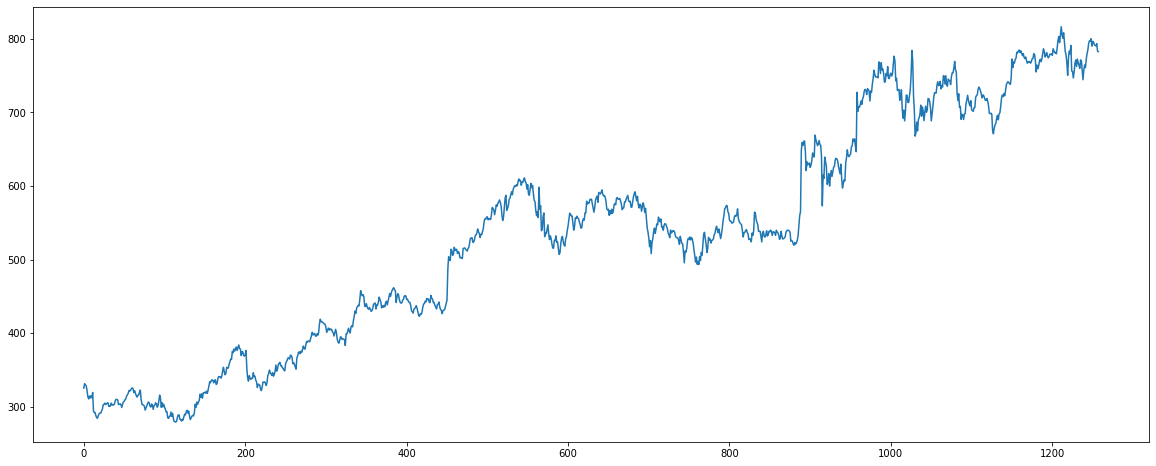

In [ ]:
dataset['Open'].plot(figsize=(20,8))

In [ ]:
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [ ]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)
training_set.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [ ]:
#feature scaling
sc = MinMaxScaler(feature_range = (0, 1))
scaled_training_set = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
k=dataset.shape[0] 
X_train = []
y_train = []
for i in range(60, k):
    X_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2)) #dropout is 20%
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

#As it is a regression case, loss is mean_square_error
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [ ]:
#Fitting the model
model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
75/75 [==============================] - 13s 99ms/step - loss: 0.0695
Epoch 2/100
75/75 [==============================] - 7s 100ms/step - loss: 0.0060
Epoch 3/100
75/75 [==============================] - 7s 99ms/step - loss: 0.0055
Epoch 4/100
75/75 [==============================] - 7s 100ms/step - loss: 0.0051
Epoch 5/100
75/75 [==============================] - 8s 100ms/step - loss: 0.0050
Epoch 6/100
75/75 [==============================] - 8s 100ms/step - loss: 0.0048
Epoch 7/100
75/75 [==============================] - 7s 99ms/step - loss: 0.0055
Epoch 8/100
75/75 [==============================] - 7s 99ms/step - loss: 0.0044
Epoch 9/100
75/75 [==============================] - 7s 100ms/step - loss: 0.0040
Epoch 10/100
75/75 [==============================] - 7s 99ms/step - loss: 0.0038
Epoch 11/100
75/75 [==============================] - 7s 100ms/step - loss: 0.0037
Epoch 12/100
75/75 [==============================] - 8s 100ms/step - loss: 0.0040
Epoch 13/100
75/7

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test (1).csv


In [ ]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)

In [ ]:
real_stock_price = test_data.iloc[:, 1:2].values

In [ ]:
test_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
test_data.shape

(20, 5)

In [ ]:
test_data["Volume"] = test_data["Volume"].str.replace(',', '').astype(float)

In [ ]:
test_set=test_data['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
final = pd.concat((dataset['Open'], test_data['Open']), axis = 0)
len(final)

1278

In [ ]:
final = pd.concat((dataset['Open'], test_data['Open']), axis = 0)
inputs = final[len(final) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_stock = model.predict(X_test)
pred_stock = sc.inverse_transform(pred_stock)

In [ ]:
X_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [ ]:
final_pred=pd.DataFrame(pred_stock)
final_pred

,0
0,782.938843
1,780.455811
2,784.776245
3,785.516846
4,789.952271
5,797.650757
6,800.756653
7,799.555115
8,800.270386
9,801.303223


In [ ]:
#r2
from sklearn.metrics import r2_score
r2_score(real_stock_price,final_pred)

-0.03720053058988171

In [ ]:
#mse
from sklearn.metrics import mean_squared_error as mse
mse(real_stock_price, final_pred)

203.7869953534925

In [ ]:
#mae
from sklearn.metrics import mean_absolute_error as mae
mae(real_stock_price,final_pred)

12.77901123046875

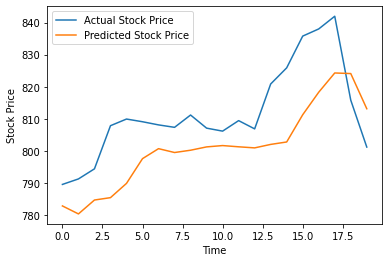

In [ ]:
plt.plot(real_stock_price,label = 'Actual Stock Price')
plt.plot(final_pred, label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()